1/1 [==============================] - 0s 413ms/step


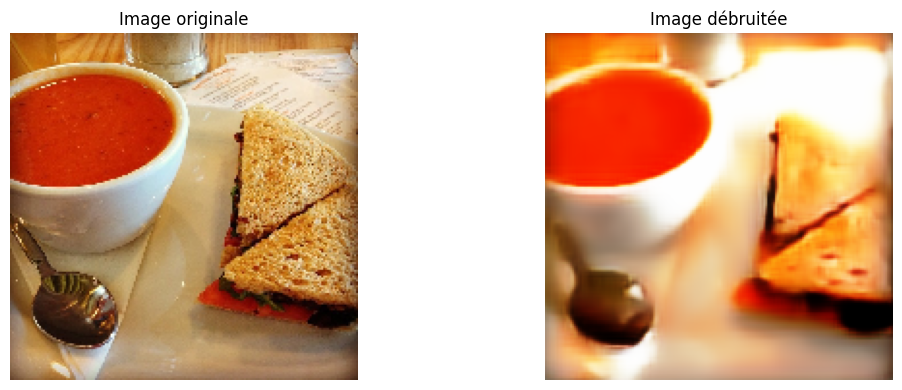

In [4]:
# Chargement des bibliothèques nécessaires
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from keras.preprocessing import image
from tensorflow.keras.models import load_model

# Chargement du modèle sauvegardé
autoencoder_model = load_model('autoencoder_model_0_015_040_pipeline.keras', compile=False)

# Chargement d'une image aléatoire depuis le dossier 'Dataset noisy'
data_dir = 'Dataset noisy'
image_files = os.listdir(data_dir)
random_image_file = random.choice(image_files)  # Sélection d'une image aléatoire
img_path = os.path.join(data_dir, random_image_file)

# Chargement et prétraitement de l'image
img = image.load_img(img_path, target_size=(180, 180))  # Redimensionnement
img_array = image.img_to_array(img) / 255.0  # Normalisation
img_array = np.expand_dims(img_array, axis=0)  # Ajout d'une dimension pour le batch

# Débruitage de l'image avec l'autoencodeur
image_debruitee = autoencoder_model.predict(img_array)[0]

# Affichage des résultats
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.imshow(img_array[0])  # Affichage de l'image originale
plt.title("Image originale")
plt.axis('off')

plt.subplot(122)
plt.imshow(image_debruitee)  # Affichage de l'image débruitée
plt.title("Image débruitée")
plt.axis('off')

plt.tight_layout()
plt.show()